# 1. Kaggle에서 데이터셋 다운로드

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashishkumarak/netflix-reviews-playstore-daily-updated")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\jh838\.cache\kagglehub\datasets\ashishkumarak\netflix-reviews-playstore-daily-updated\versions\171


In [5]:
import pandas as pd

#데이터셋 불러오기
df=pd.read_csv(path + "\\netflix_reviews.csv")

In [7]:
#데이터프레임의 상단 5개 데이터 출력
df.head(5)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,516f368f-72d8-4abf-9400-e066f2f07b42,Rakesh Patel,Ok,5,0,8.137.0 build 4 50942,2024-10-27 13:54:52,8.137.0 build 4 50942
1,66d0176c-3838-4ecc-aead-d10588ec6887,Tabassum Kausar,Only problem is that we can't search year wise...,3,0,8.137.0 build 4 50942,2024-10-27 13:53:46,8.137.0 build 4 50942
2,a3c8308c-eed0-4cbb-adab-6a076f48a7ab,Hi mu,Good 💜,5,0,NaN,2024-10-27 13:49:19,NaN
3,6c6cd609-cfb2-4a7e-b35f-48b289e2984a,Brian C,Can't cast to Chromecast. Unacceptable.,1,0,8.137.0 build 4 50942,2024-10-27 13:43:37,8.137.0 build 4 50942
4,641edd00-95ec-4214-a03f-60fccafbbb8e,Evans Mgeusa,Amazing,5,0,8.137.0 build 4 50942,2024-10-27 13:42:29,8.137.0 build 4 50942


In [9]:
#데이터프레임의 하단 5개 데이터 출력
df.tail(5)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
117640,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
117641,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
117642,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
117643,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346
117644,dc1352e9-10a8-41ca-ab23-05d045b08e90,suraj soni,"this app is awesome for english movies ,series...",4,0,NaN,2020-05-24 11:04:08,NaN


In [11]:
#데이터프레임의 column과 shape 출력
print("Shape of the dataset:", df.shape)
print("Columns in the dataset:",df.columns)

Shape of the dataset: (117645, 8)
Columns in the dataset: Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


# 2. 데이터 전처리

In [13]:
import re

# 전처리 함수
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

df.content = df.content.apply(preprocess_text)
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,516f368f-72d8-4abf-9400-e066f2f07b42,Rakesh Patel,ok,5,0,8.137.0 build 4 50942,2024-10-27 13:54:52,8.137.0 build 4 50942
1,66d0176c-3838-4ecc-aead-d10588ec6887,Tabassum Kausar,only problem is that we cant search year wise ...,3,0,8.137.0 build 4 50942,2024-10-27 13:53:46,8.137.0 build 4 50942
2,a3c8308c-eed0-4cbb-adab-6a076f48a7ab,Hi mu,good,5,0,NaN,2024-10-27 13:49:19,NaN
3,6c6cd609-cfb2-4a7e-b35f-48b289e2984a,Brian C,cant cast to chromecast unacceptable,1,0,8.137.0 build 4 50942,2024-10-27 13:43:37,8.137.0 build 4 50942
4,641edd00-95ec-4214-a03f-60fccafbbb8e,Evans Mgeusa,amazing,5,0,8.137.0 build 4 50942,2024-10-27 13:42:29,8.137.0 build 4 50942


# 3. Feature 분석(EDA)

In [15]:
import seaborn as sns  # 그래프를 그리기 위한 seaborn 라이브러리 임포트 
import matplotlib.pyplot as plt  # 그래프 표시를 위한 pyplot 임포트

C:\Users\jh838\AppData\Local\Temp\ipykernel_3528\3620948905.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='score', palette='tab10')


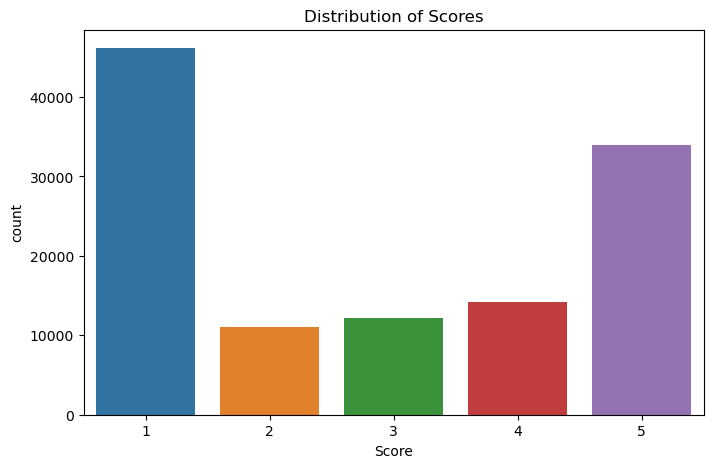

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='score', palette='tab10')
plt.xlabel("Score")
plt.ylabel("count")
plt.title('Distribution of Scores')
plt.show()

# 4. 리뷰 예측 모델 학습시키기(LSTM)

In [19]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

C:\Users\jh838\anaconda3\Lib\site-packages\torchtext\data\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
C:\Users\jh838\anaconda3\Lib\site-packages\torchtext\vocab\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
C:\Users\jh838\anaconda3\Lib\site-packages\torchtext\utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is d

In [21]:
#데이터셋 클래스 정의
class ReviewDataset(Dataset):
    def __init__(self, reviews, ratings, text_pipeline, label_pipeline):
        self.reviews = reviews
        self.ratings = ratings
        self.text_pipeline = text_pipeline
        self.label_pipeline = label_pipeline
        
    def __len__(self):
        return len(self.reviews)
    
    def __getitem__(self, idx):
        review = self.text_pipeline(self.reviews[idx])
        rating = self.label_pipeline(self.ratings[idx])
        return torch.tensor(review), torch.tensor(rating)
    
    
#데이터셋 정의
train_reviews, test_reviews, train_ratings, test_ratings = train_test_split(df.content.to_list(),df.score.to_list(),test_size=0.2, random_state=42)

tokenizer=get_tokenizer('basic_english')
vocab=build_vocab_from_iterator(map(tokenizer, train_reviews), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

max_size = max(len(k.split()) for k in train_reviews + test_reviews)
def text_pipeline(text, size=max_size):
    k = [vocab[token] for token in tokenizer(text)]
    # 배치 처리를 위해 벡터의 길이를 맞춰준다.
    return k + [0] * (size - len(k))
label_pipeline = lambda label: [float(i + 1 == label) for i in range(5)]

train_dataset = ReviewDataset(train_reviews, train_ratings, text_pipeline, label_pipeline)
test_dataset = ReviewDataset(test_reviews, test_ratings, text_pipeline, label_pipeline)


#데이터로더 정의
BATCH_SIZE=64
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [22]:
#LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self,vocab_size, embed_dim, hidden_dim, output_dim):
        super(LSTMModel,self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.lstm=nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc= nn.Linear(hidden_dim, output_dim)
        self.softmax=nn.Softmax()
    
    def forward(self,text):
        embedded=self.embedding(text)
        output, (hidden, cell)=self.lstm(embedded.unsqueeze(0))
        output=self.fc(output[-1])
        return self.softmax(output)
    
#하이퍼 패러미터 정의
VOCAB_SIZE = len(vocab)
EMBED_DIM = 96
HIDDEN_DIM = 192
OUTPUT_DIM = 5

model = LSTMModel(VOCAB_SIZE, EMBED_DIM, HIDDEN_DIM, OUTPUT_DIM)

In [25]:
# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(model.parameters(), lr=0.03)

# 모델 학습은 직접 작성해보세요!!!

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 손실 출력
        running_loss += loss.item()
        if i % 100 == 99:  # 매 100 미니배치마다 출력
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

C:\Users\jh838\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


[Epoch 1, Batch 100] loss: 1.500
[Epoch 1, Batch 200] loss: 1.481
[Epoch 1, Batch 300] loss: 1.456
[Epoch 1, Batch 400] loss: 1.417
[Epoch 1, Batch 500] loss: 1.375
[Epoch 1, Batch 600] loss: 1.352
[Epoch 1, Batch 700] loss: 1.338
[Epoch 1, Batch 800] loss: 1.346
[Epoch 1, Batch 900] loss: 1.332
[Epoch 1, Batch 1000] loss: 1.320
[Epoch 1, Batch 1100] loss: 1.319
[Epoch 1, Batch 1200] loss: 1.307
[Epoch 1, Batch 1300] loss: 1.310
[Epoch 1, Batch 1400] loss: 1.312
[Epoch 2, Batch 100] loss: 1.303
[Epoch 2, Batch 200] loss: 1.302
[Epoch 2, Batch 300] loss: 1.310
[Epoch 2, Batch 400] loss: 1.302
[Epoch 2, Batch 500] loss: 1.307
[Epoch 2, Batch 600] loss: 1.298
[Epoch 2, Batch 700] loss: 1.298
[Epoch 2, Batch 800] loss: 1.290
[Epoch 2, Batch 900] loss: 1.295
[Epoch 2, Batch 1000] loss: 1.293
[Epoch 2, Batch 1100] loss: 1.304
[Epoch 2, Batch 1200] loss: 1.282
[Epoch 2, Batch 1300] loss: 1.297
[Epoch 2, Batch 1400] loss: 1.293
[Epoch 3, Batch 100] loss: 1.293
[Epoch 3, Batch 200] loss: 1.298


In [27]:
#모델 자체를 통째로 저장하기
#model_scripted = torch.jit.script(model)
#model_scripted.save('model.pth')

#모델 자체를 통째로 저장하기
model = torch.jit.load('model.pth')

In [29]:
text = "It's great, but there is some bugs"

def predict_review(model, review):
    model.eval()
    with torch.no_grad():
        tensor_review = torch.tensor(text_pipeline(text))
        output = model(tensor_review.reshape(-1, max_size))
        print(f'모델 출력: {output}')
        print(f'확률이 가장 높은 별점: {output.argmax() + 1}')
        print(f'기댓값: {round(np.sum(np.array([1, 2, 3, 4, 5]) * output.detach().numpy()), 2)}')

predict_review(model, text)

모델 출력: tensor([[0.0178, 0.0214, 0.0980, 0.3624, 0.5004]])
확률이 가장 높은 별점: 5
기댓값: 4.31


code/__torch__/torch/nn/functional.py:140: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


# 5. NLP 이용해보기

In [31]:
pip install nltk textblob gensim

Note: you may need to restart the kernel to use updated packages.


In [38]:
# 텍스트 전처리와 자연어 처리를 위한 라이브러리
import nltk
from textblob import TextBlob

# 토픽 모델링을 위한 라이브러리
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

# 감성 분석을 위한 함수
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['content'].apply(get_sentiment)
# df에 sentiment 값을 적용을 먼저 하시고, 아래와 같이 긍정과 부정을 분류하세요.
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))

df[['content', 'score', 'sentiment_label']]

,content,score,sentiment_label
0,ok,5,positive
1,only problem is that we cant search year wise ...,3,positive
2,good,5,positive
3,cant cast to chromecast unacceptable,1,neutral
4,amazing,5,positive
...,...,...,...
117640,i really like it there are so many movies and ...,5,positive
117641,i love netflix i always enjoy my time using it,5,positive
117642,sound quality is very slow of movies,1,neutral
117643,rate is very expensive bcos we see netflix sun...,1,negative


# 6. 긍정/부정 리뷰의 Wordcloud 그려보기

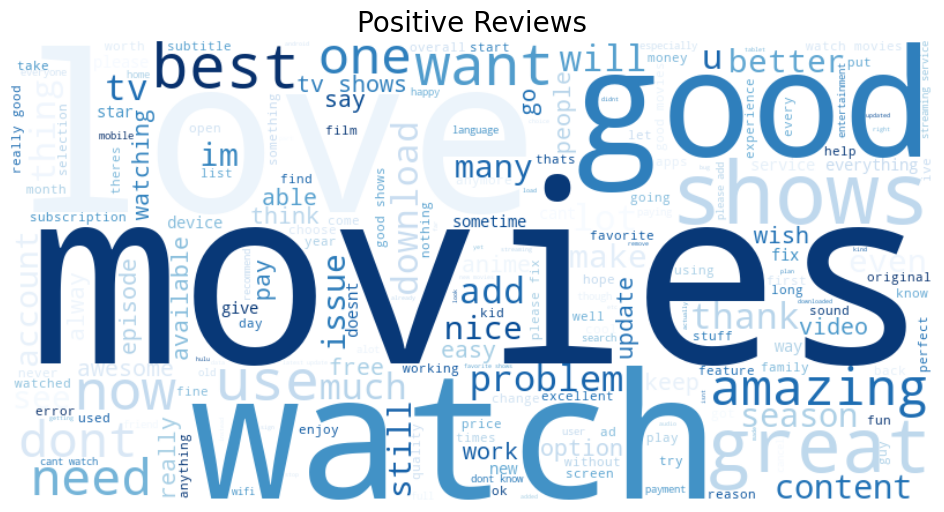

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS

positive_reviews = df[df.sentiment_label == 'positive'].content
negative_reviews = df[df.sentiment_label == 'negative'].content

# 텍스트 합치기
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

# 불용어를 제거
stopwords = set(STOPWORDS)
stopwords.update(['netflix', 'movie', 'show', 'time', 'app', 'series', 'phone']) 


# 긍정적 리뷰 워드 클라우드 생성
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Blues', stopwords=stopwords).generate(positive_text)

# 워드 클라우드 시각화
plt.figure(figsize=(12, 6))

# 세부설정
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews', fontsize=20)
plt.show()

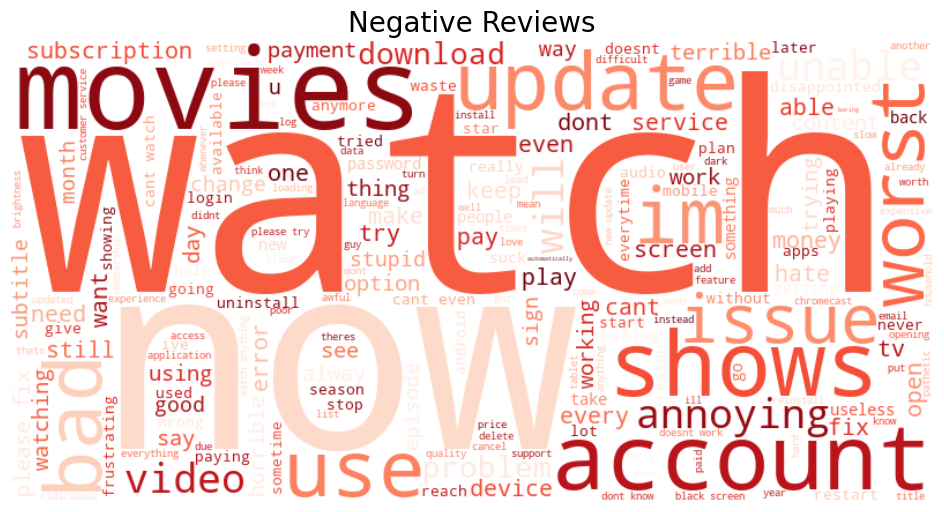

In [47]:
# 부정적 리뷰 워드 클라우드 생성 
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds', stopwords=stopwords).generate(negative_text)

# 워드 클라우드 시각화
plt.figure(figsize=(12, 6))

# 세부 설정
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews', fontsize=20)
plt.show()